Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Telco Customer Churn Dataset from Kaggle:

In [3]:
from google.colab import files
uploaded = files.upload()


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (1).csv


Load Data

In [4]:
import pandas as pd

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
import os
os.listdir()

['.config',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'WA_Fn-UseC_-Telco-Customer-Churn (1).csv',
 'sample_data']

Clean Data

In [6]:
df.drop(['customerID'], axis=1, inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

Encode Categorical Columns

In [7]:
for column in df.select_dtypes(include='object').columns:
    if column != 'Churn':
        df[column] = LabelEncoder().fit_transform(df[column])

Encode Target Variable

In [8]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

Train/Test Split

In [9]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Scaling

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model Training: Random Forest

In [11]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Evaluation

Accuracy: 0.7903340440653873
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



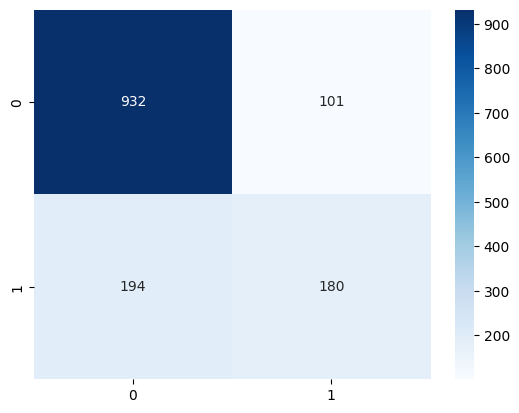

In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()

Feature Importance

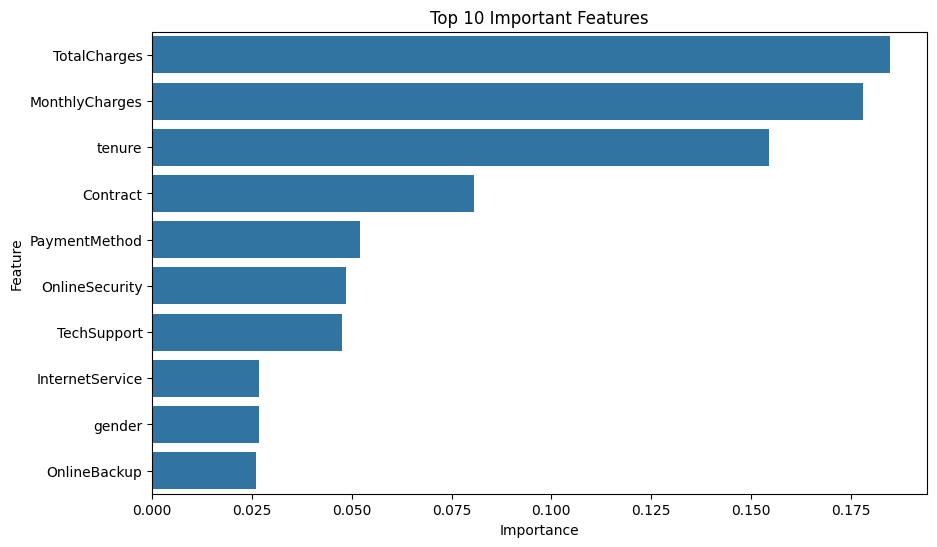

In [13]:
importances = model.feature_importances_
features = X.columns

feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df.sort_values('Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df.head(10))
plt.title("Top 10 Important Features")
plt.show()

User Interface using Gradio

In [23]:
import gradio as gr

sample_input = X.iloc[0].copy()

def predict_churn(gender, senior, tenure, monthly, contract):
    sample_input['gender'] = gender
    sample_input['SeniorCitizen'] = senior
    sample_input['tenure'] = tenure
    sample_input['MonthlyCharges'] = monthly
    sample_input['Contract'] = contract

    input_scaled = scaler.transform([sample_input])

    prediction = model.predict(input_scaled)[0]
    return "Will Churn" if prediction == 1 else "Will Stay"

demo = gr.Interface(
    fn=predict_churn,
    inputs=[
        gr.Number(label="Gender (0=Female, 1=Male)"),
        gr.Number(label="SeniorCitizen (0=No, 1=Yes)"),
        gr.Number(label="Tenure (Months)"),
        gr.Number(label="Monthly Charges"),
        gr.Number(label="Contract (0=Month-to-month, 1=One year, 2=Two year)")
    ],
    outputs="text",
    title="""
    <span style='font-size:26px; font-weight:bold'>Customer Churn Predictor</span>
    """,
    description="""
    <span style='font-size:16px'>
    Instantly predict whether a customer will stay or churn by entering just a few details — powered by a trained AI model.
    </span>
    """
)

demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f8998d1e20d4464fec.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
